# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

### Early Stopping
- Keras can automatically stop training based on a loss condition on the validation data during the **model.fit()** call


### Dropout Layers
- Dropout layers are layers that can be added to layers to **turn off** neurons during training to prevent overfitting
- Each Dropout layer will **drop** a user-defined percentage of neuron units in the previous layer every bathch
  - Basically what we do is eachh dropout layer will drop or turn off a user defined percentage of neurons units in the previous layer, every batch. 
  - So that means certain neurons don't have their weights or biases affected during a batch, instead thet are just turned off.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("F:\\05- UDEMY COURSES\\02- Data Science\\Py_DS_ML_Bootcamp-master\\TensorFlow_FILES\\DATA\\cancer_classification.csv")

In [3]:
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploratory Data Analysis

#### For calssification tasks, it's always a good idea to do a `"count plot"` of our actual label, to see the number of instances per label, and se if it's a well balanced problem or not.  

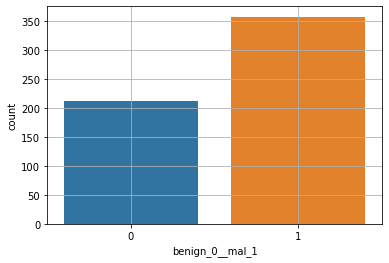

In [6]:
# benign_0__mal_1

sns.countplot(data=df, x=df.benign_0__mal_1)
plt.grid()

<AxesSubplot:>

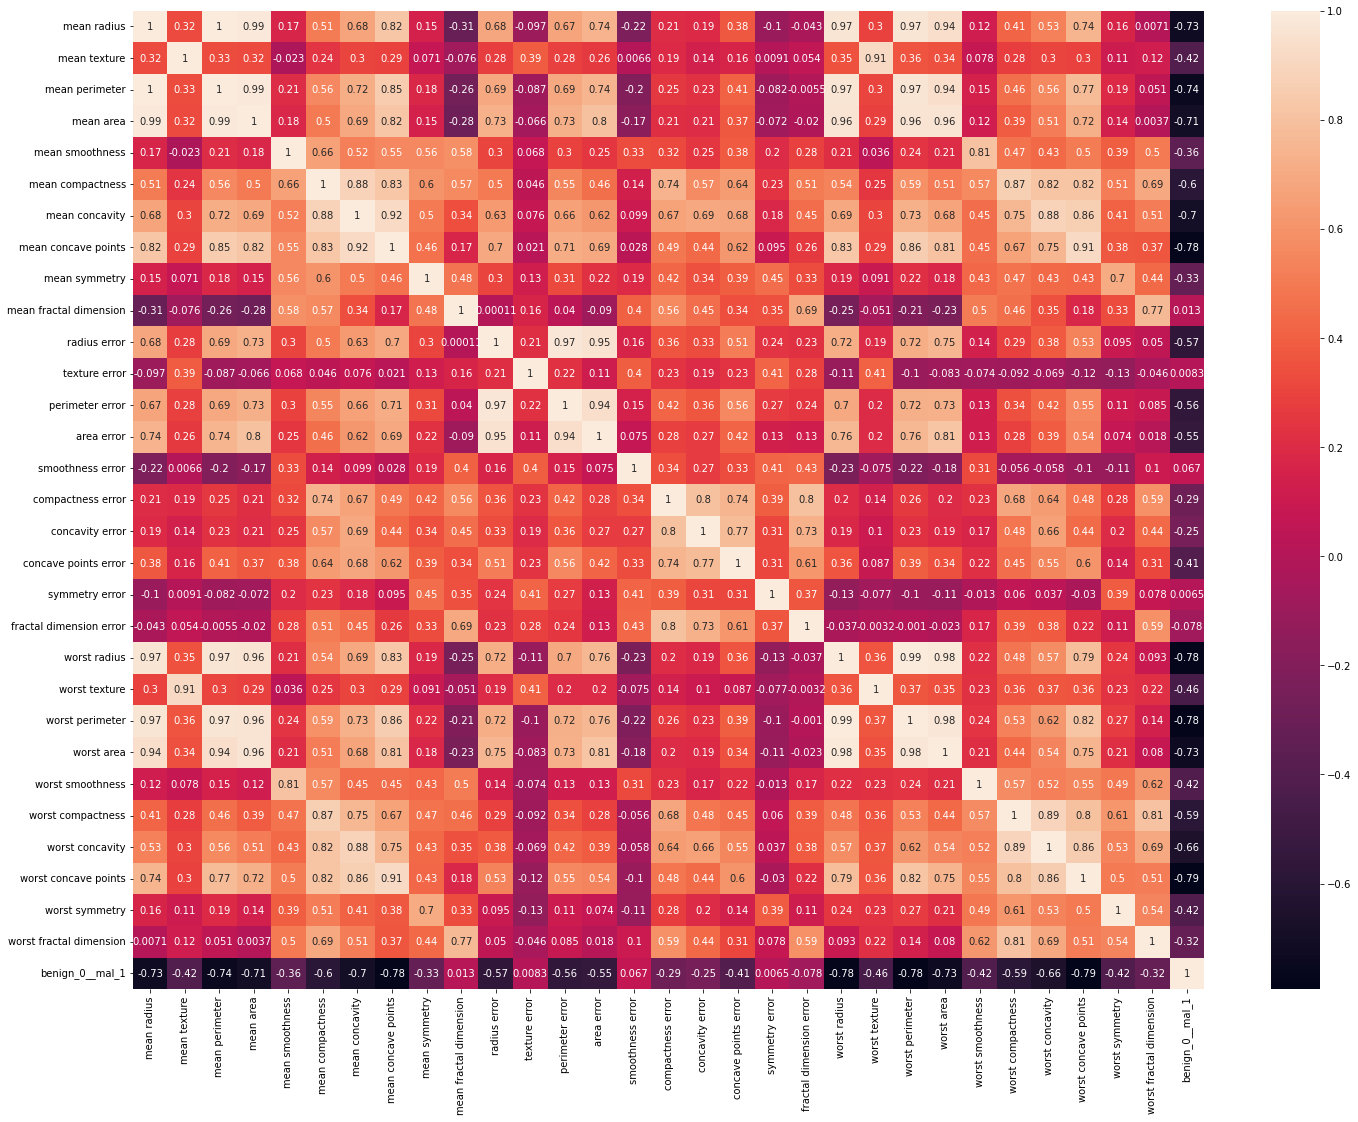

In [7]:
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(), annot=True)

In [8]:
# Checking the top correaltion with 'benign_0__mal_1'
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

<AxesSubplot:>

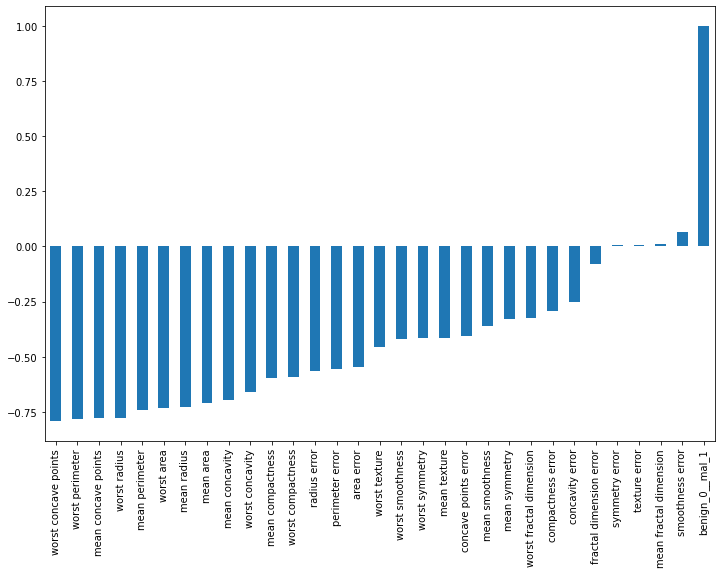

In [9]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

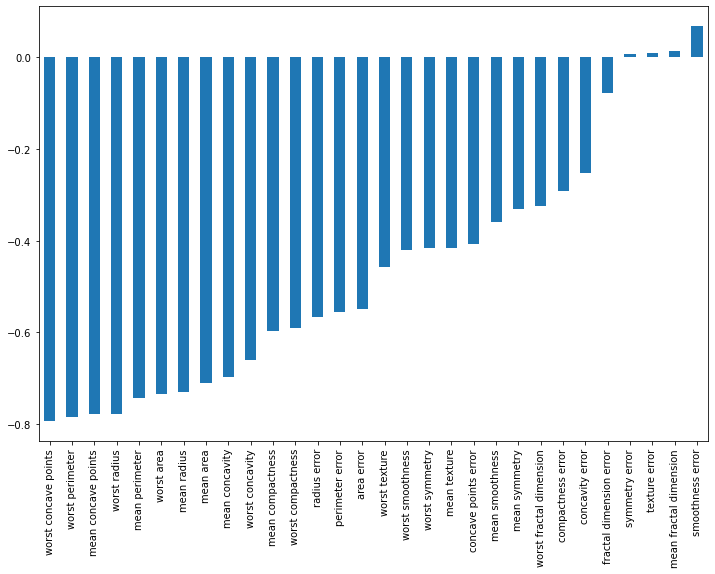

In [10]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
# Dropping the 'label column'

## Train Test Split


In [11]:
# by adding ".values", it's data type becomes "numpy array"
X = df.drop('benign_0__mal_1', axis=1).values
y = df.benign_0__mal_1.values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
# Fitting an d trsnforming the train data
X_train = scaler.fit_transform(X_train)

In [17]:
# Transforming the test data
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
# Creating a sequential model
model = Sequential()

# Adding layers to the model
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

# OPTPUT layer
# activation = 'sigmoid', because it ia a "Binary Classification" problem
model.add(Dense(units=1, activation='sigmoid'))

# For a binary classification problem
model.compile(optimizer='adam', loss='binary_crossentropy')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [21]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600, 
          validation_data=(X_test, y_test), 
          verbose=1)

Epoch 1/600
14/14 [==============================] - 2s 31ms/step - loss: 0.6890 - val_loss: 0.6720
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6462 - val_loss: 0.6279
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6013 - val_loss: 0.5742
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5443 - val_loss: 0.5145
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4878 - val_loss: 0.4575
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4328 - val_loss: 0.4032
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3842 - val_loss: 0.3560
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3414 - val_loss: 0.3130
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3012 - val_loss: 0.2771
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2692 - val_loss: 0.2484
Epoch 11

In [22]:
# model.history.history

In [23]:
model_loss = pd.DataFrame(model.history.history)

In [24]:
model_loss.head()

,loss,val_loss
0,0.688987,0.672022
1,0.646243,0.627877
2,0.601290,0.574181
3,0.544257,0.514459
4,0.487766,0.457506


<AxesSubplot:>

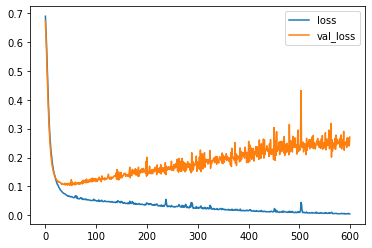

In [25]:
model_loss.plot()

    At a certain point in time, notice that out trining loss here in "Blue" is still going down.
    However, our "validation loss" is begining to increase, that basically tells is that we're "OVERFITTING" to our training data set

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

### Callbacks
- A callback is a function that is called repeatedly during a process (for example the training of a neural network) and which generally serves to **validate** or **correct certain behaviors**. 
- In machine learning, we can use callbacks to define **what happens before, during, or at the end of a training epoch.**

- Callbacks can help you prevent **`overfitting, visualize training progress, debug your code, save checkpoints, generate logs, create a TensorBoard, etc`**. 
- There are many callbacks readily available in TensorFlow, and you can use multiple.

### Different types of callbacks available in Tensorflow


#### 1. EarlyStopping:
   - This callback is used very often. This allows us to **monitor our metrics**, and **stop model training when it stops improving**.

#### 2. ModelCheckpoint:
   - This callback allows us to **save the model regularly during training**. 
   - This is especially useful when training deep learning models which **take a long time to train**.
   - **`This callback monitors the training and saves model checkpoints at regular intervals, based on the metrics`.**
   
#### 3. TensorBoard 
   - This is one of the best callbacks if you want to visualize the training summary for your model. 
   - This callback generates the logs for TensorBoard, which you can later launch to visualize the progress of your training. 
   
    And many more callbacks are available to us:
    
    4. LearningRateScheduler 
    5. CSVLogger
    6. LambdaCallback
    7. ReduceLROnPlateau
    8. RemoteMonitor
    9. BaseLogger & History
    10. TerminateOnNaN

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

# BINARY CLASSIFICATION (output layer)
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
# help(EarlyStopping)

### EarlyStopping()
**Stop training when a monitored quantity has stopped improving.**

### Arguments:
- **monitor:** Quantity to be monitored or metric to monitor(here, validation loss) 
        
        
- **min_delta:** Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

            
- **patience:** Number of epochs with no improvement after which training will be stopped (or it will still wait for patience = 'n' epochs even after we're kind of detected a stopping point because of noise that could occur.)

            
- **verbose:** verbosity mode.


- **mode:** One of `{"auto", "min", "max"}`.
    - **`Mode is basically what are you actually trying too do here, are you trying to minimize the thing you are "monitoring(here val_loss)"? or maximise you are monitoring(here val_loss)?`**
    
        - In `min` mode, training will stop when the quantity monitored has stopped decreasing; 
        - In `max` mode it will stop when the quantity monitored has stopped increasing; 
        - In `auto` mode, the direction is automatically inferred from the name of the monitored quantity.
        
            - **So we can imagine if our metric was "accuracy", then accuracy is somethin we want to maximize**
            - **If out metric is loss, then loss is something we want to minimize**

In [29]:
# Early stopping, basically have two steps:
    # 1. TO define variable

early_stop = EarlyStopping(monitor='val_loss', 
                          mode='min',
                          verbose=1,
                          patience=25)

In [30]:
# Training the model with "CALLBACKS" this time
# we have to "callbacks" as a list
model.fit(x=X_train,
          y=y_train, 
          epochs=600, 
          validation_data=(X_test, y_test),
          callbacks= [early_stop])

Epoch 1/600
14/14 [==============================] - 2s 26ms/step - loss: 0.6461 - val_loss: 0.6209
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5999 - val_loss: 0.5772
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5575 - val_loss: 0.5345
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5147 - val_loss: 0.4885
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4726 - val_loss: 0.4426
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4321 - val_loss: 0.4046
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3964 - val_loss: 0.3647
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3655 - val_loss: 0.3343
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3331 - val_loss: 0.3000
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3036 - val_loss: 0.2773
Epoch 11

In [31]:
model.history.history

{'loss': [0.646121621131897,
  0.5998697280883789,
  0.5575464367866516,
  0.514655590057373,
  0.4725874066352844,
  0.43212175369262695,
  0.3964368402957916,
  0.36552590131759644,
  0.33306002616882324,
  0.30361613631248474,
  0.2773036062717438,
  0.26061055064201355,
  0.24059967696666718,
  0.22239559888839722,
  0.20682337880134583,
  0.1933954954147339,
  0.1836477518081665,
  0.17246496677398682,
  0.16670562326908112,
  0.15660154819488525,
  0.15057975053787231,
  0.14195223152637482,
  0.13555781543254852,
  0.1287427693605423,
  0.12416914850473404,
  0.11851498484611511,
  0.11256285011768341,
  0.10859649628400803,
  0.10477057099342346,
  0.10036401450634003,
  0.09851554036140442,
  0.09536899626255035,
  0.09144555032253265,
  0.09152132272720337,
  0.0870409682393074,
  0.08351040631532669,
  0.08197913318872452,
  0.08210494369268417,
  0.07775028049945831,
  0.07582464069128036,
  0.07667086273431778,
  0.07289516925811768,
  0.07244466245174408,
  0.070695683360

In [32]:
model_loss = pd.DataFrame(model.history.history)

In [33]:
model_loss.head()

,loss,val_loss
0,0.646122,0.620896
1,0.599870,0.577193
2,0.557546,0.534541
3,0.514656,0.488531
4,0.472587,0.442618


<AxesSubplot:>

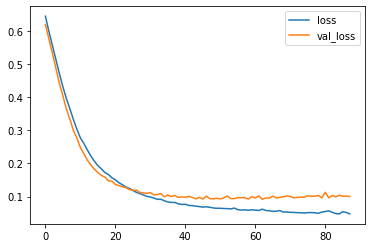

In [34]:
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [35]:
from tensorflow.keras.layers import Dropout

### DROPOUT call

What we're going to do is after each of **DENSE** layer we will add in the **DROPOUT** call.

#### The Dropout layer randomly sets input units to 0 with a frequency of `rate` at each step during training time, which helps prevent overfitting

The main parameter we chooose with DROPOUT is **rate**
- **rate:** rate is the probability that we're going to randomly turn off  the actual NEURONS.

In [36]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(rate=0.5))

# BINARY CLASSIFICATION (output layer)
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [37]:
# We'll use this model with the combination with CALLBACKS model
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=25, 
                           verbose=1, 
                           mode='min')

In [38]:
# Fitting the model
model.fit(x=X_train, 
          y=y_train, 
          epochs=600, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 27ms/step - loss: 0.6987 - val_loss: 0.6802
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6738 - val_loss: 0.6593
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6593 - val_loss: 0.6329
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6479 - val_loss: 0.6035
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6100 - val_loss: 0.5737
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5598 - val_loss: 0.5348
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5503 - val_loss: 0.4950
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5391 - val_loss: 0.4633
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5087 - val_loss: 0.4298
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4822 - val_loss: 0.3973
Epoch 11

In [39]:
model.history.history

{'loss': [0.6987113356590271,
  0.6737703680992126,
  0.6592931747436523,
  0.6479470133781433,
  0.609987199306488,
  0.5597862005233765,
  0.5503399968147278,
  0.5391277074813843,
  0.508657693862915,
  0.48218536376953125,
  0.45207569003105164,
  0.44127023220062256,
  0.4271984100341797,
  0.41907835006713867,
  0.378317654132843,
  0.3824917674064636,
  0.3381929397583008,
  0.3391363024711609,
  0.3135122060775757,
  0.32017895579338074,
  0.2990053594112396,
  0.2871485948562622,
  0.287384957075119,
  0.26805058121681213,
  0.2624491751194,
  0.2453165203332901,
  0.2550918459892273,
  0.21601161360740662,
  0.23101679980754852,
  0.22048047184944153,
  0.23111975193023682,
  0.22285974025726318,
  0.17924174666404724,
  0.22158896923065186,
  0.20854048430919647,
  0.17677509784698486,
  0.18661828339099884,
  0.19393333792686462,
  0.15709936618804932,
  0.17474575340747833,
  0.18178333342075348,
  0.1459895521402359,
  0.18957023322582245,
  0.16961415112018585,
  0.15751

In [40]:
model_loss = pd.DataFrame(model.history.history)

In [41]:
model_loss.head()

,loss,val_loss
0,0.698711,0.680228
1,0.673770,0.659327
2,0.659293,0.632902
3,0.647947,0.603511
4,0.609987,0.573722


<AxesSubplot:>

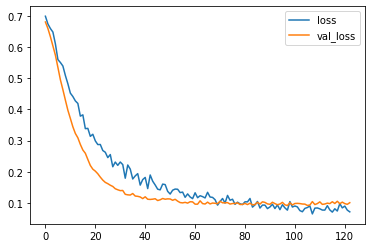

In [42]:
model_loss.plot()

In [43]:
# px.line(data_frame=model_loss)

## Model Evaluation

In [44]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [45]:
# predictions

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [47]:
# Classificaiton Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



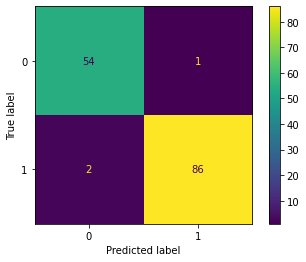

In [48]:
# Confustion matrix
conf_mat = confusion_matrix(y_test, predictions)
cf_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
cf_display.plot()

## Predicting On A Brand New Data

In [49]:
# Originally 0 / False
new_data = df.drop('benign_0__mal_1', axis=1).iloc[0]

In [50]:
new_data = scaler.transform(new_data.values.reshape(-1, 30))

In [51]:
new_data

array([[0.53862713, 0.0226581 , 0.5520928 , 0.36373277, 0.59375282,
        0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
        0.40381852, 0.11996373, 0.43771307, 0.27323299, 0.21677384,
        0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
        0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
        0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396]])

In [52]:
(model.predict(new_data) > 0.5).astype("int32")

1/1 [==============================] - 0s 33ms/step


array([[0]])

In [53]:
# Originally 1 / True
new_data1 = df.drop('benign_0__mal_1', axis=1).iloc[19]

In [54]:
new_data1 = scaler.transform(new_data1.values.reshape(-1, 30))

In [55]:
new_data1

array([[0.32090611, 0.15725397, 0.30514988, 0.17934252, 0.40769161,
        0.18989633, 0.15613871, 0.23762425, 0.41666667, 0.16217355,
        0.06503798, 0.09415771, 0.07271   , 0.0305287 , 0.31220798,
        0.09273891, 0.06027778, 0.24910021, 0.16769854, 0.04854691,
        0.25542512, 0.19296375, 0.24548035, 0.12927645, 0.48094829,
        0.14554045, 0.19089457, 0.44261168, 0.27833629, 0.11511216]])

In [56]:
(model.predict(new_data1) > 0.5).astype("int32")

1/1 [==============================] - 0s 31ms/step


array([[1]])

## Saving The Model

In [57]:
from tensorflow.keras.models import load_model

In [58]:
model.save('breast_cancer_prediction.h5')

### Now we have saved the model,  and can call it whenever we want to use that model.

In [59]:
saved_model = load_model('breast_cancer_prediction.h5')

In [62]:
# For new_data
(saved_model.predict(new_data) > 0.5).astype("int32")

1/1 [==============================] - 0s 37ms/step


array([[0]])

In [63]:
# For new_data1
(saved_model.predict(new_data1) > 0.5).astype("int32")

1/1 [==============================] - 0s 31ms/step


array([[1]])